In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
train_dir = 'dataset1/training_set'
test_dir = 'dataset1/test_set'

In [41]:
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
# training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                      validation_split=0.2,
                                                      subset='training',
                                                      batch_size=BATCH_SIZE,
                                                      image_size=IMAGE_SIZE,
                                                      seed=123)
# validation dataset
valid_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                      validation_split=0.2,
                                                      subset='validation',
                                                      batch_size=BATCH_SIZE,
                                                      image_size=IMAGE_SIZE,
                                                      seed=123)
# test dataset
test_t = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                    batch_size=BATCH_SIZE,
                                                    image_size=IMAGE_SIZE)

Found 240 files belonging to 2 classes.
Using 192 files for training.
Found 240 files belonging to 2 classes.
Using 48 files for validation.
Found 34 files belonging to 2 classes.


In [4]:
from tensorflow.keras.models import Sequential

from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation
from keras import regularizers, optimizers, layers
from tensorflow.keras import regularizers

In [5]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
          
          
model.add(Dense(64))
model.add(Activation('relu'))

          
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [6]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
             metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 activation (Activation)     (None, 222, 222, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 788544)            0         
                                                                 
 dense (Dense)               (None, 64)                50466880  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

In [8]:
history = model.fit(train_ds, epochs=100, validation_data=valid_ds)

Epoch 1/100
6/6 [==============================] - 7s 1s/step - loss: 7024.3188 - accuracy: 0.5312 - val_loss: 6829.7075 - val_accuracy: 0.5417
Epoch 2/100
6/6 [==============================] - 6s 981ms/step - loss: 3464.3953 - accuracy: 0.4375 - val_loss: 1894.2543 - val_accuracy: 0.4583
Epoch 3/100
6/6 [==============================] - 6s 912ms/step - loss: 1094.3698 - accuracy: 0.5260 - val_loss: 302.7755 - val_accuracy: 0.5000
Epoch 4/100
6/6 [==============================] - 6s 946ms/step - loss: 318.6364 - accuracy: 0.6042 - val_loss: 290.4214 - val_accuracy: 0.4583
Epoch 5/100
6/6 [==============================] - 6s 1s/step - loss: 150.3881 - accuracy: 0.5365 - val_loss: 129.7395 - val_accuracy: 0.5833
Epoch 6/100
6/6 [==============================] - 7s 1s/step - loss: 35.6352 - accuracy: 0.6979 - val_loss: 22.4137 - val_accuracy: 0.5833
Epoch 7/100
6/6 [==============================] - 6s 969ms/step - loss: 15.0240 - accuracy: 0.7760 - val_loss: 51.1301 - val_accuracy: 

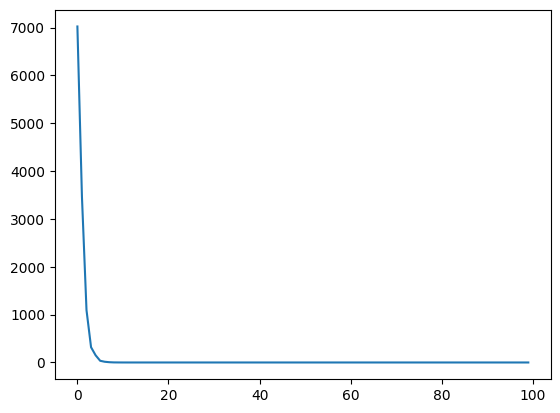

In [9]:
plt.plot(history.history['loss'])

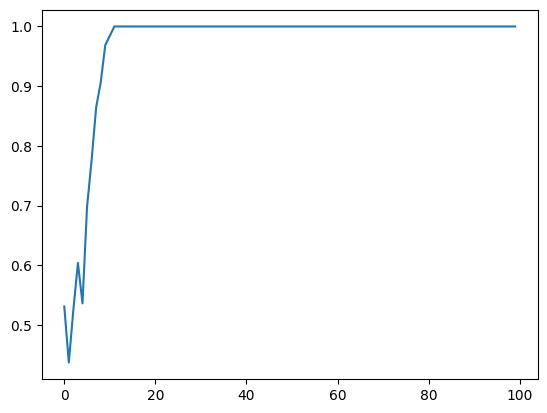

In [10]:
plt.plot(history.history['accuracy'])

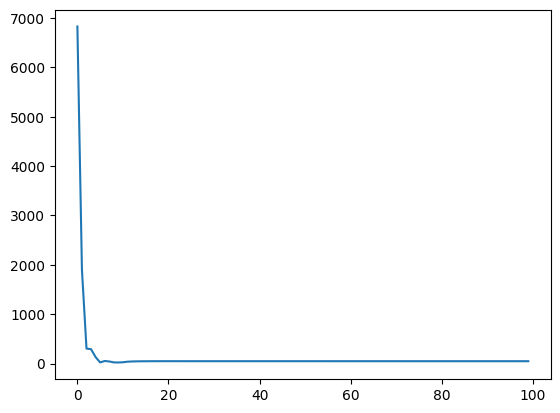

In [11]:
plt.plot(history.history['val_loss'])

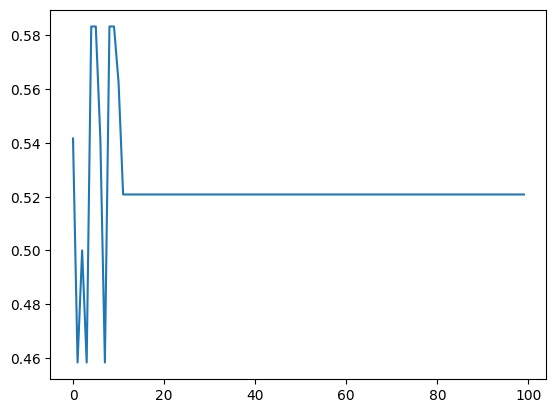

In [12]:
plt.plot(history.history['val_accuracy'])

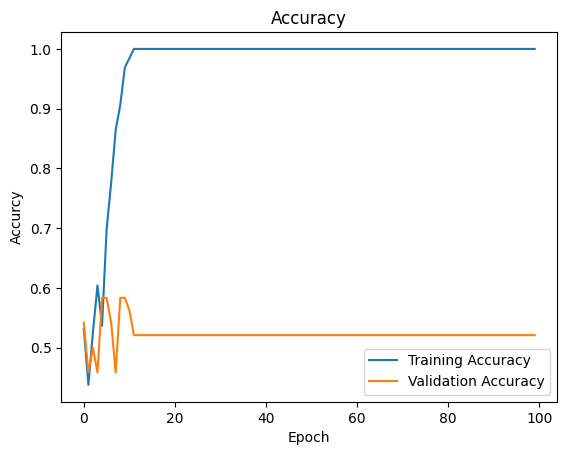

In [13]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accurcy')
plt.legend()
plt.show()

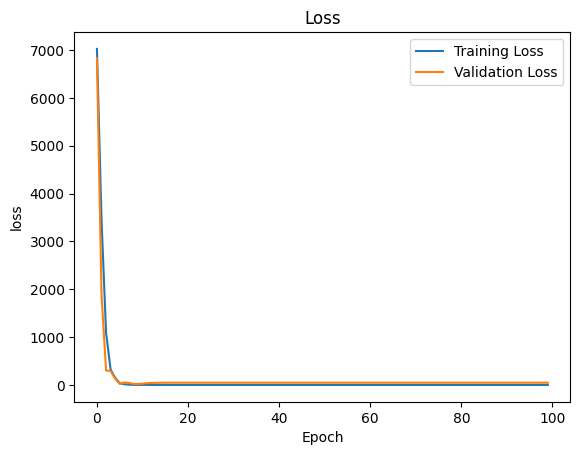

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
from tensorflow import keras

In [16]:
# AlexNet Architecture
model1 = keras.models.Sequential([
    # 1st convolutional layer
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    # 2nd convolutional layer
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    # 3rd convolutional layer
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    # 4th convolutional layer
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    # 5th convolutional layer
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    # flattening
    keras.layers.Flatten(),
    # 1st fully connected layer
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    # 2nd fully connected layer
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    # Output layer
    keras.layers.Dense(1,activation='sigmoid')  
    
])

In [17]:
model1.compile(optimizer='adam', 
              loss='binary_crossentropy',
#              metrics=[tf.keras.metrics.Accuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
              metrics=['accuracy'])

In [18]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                      

In [19]:
history1 = model1.fit(train_ds, epochs=100, validation_data=valid_ds)

Epoch 1/100
6/6 [==============================] - 8s 961ms/step - loss: 2.7369 - accuracy: 0.5104 - val_loss: 267.2007 - val_accuracy: 0.4583
Epoch 2/100
6/6 [==============================] - 6s 974ms/step - loss: 2.5581 - accuracy: 0.5312 - val_loss: 210.8783 - val_accuracy: 0.4583
Epoch 3/100
6/6 [==============================] - 6s 989ms/step - loss: 1.6468 - accuracy: 0.6510 - val_loss: 792.0849 - val_accuracy: 0.5417
Epoch 4/100
6/6 [==============================] - 6s 973ms/step - loss: 1.9889 - accuracy: 0.6771 - val_loss: 1725.4391 - val_accuracy: 0.4583
Epoch 5/100
6/6 [==============================] - 6s 970ms/step - loss: 1.8905 - accuracy: 0.6875 - val_loss: 320.2116 - val_accuracy: 0.5417
Epoch 6/100
6/6 [==============================] - 6s 1s/step - loss: 1.4367 - accuracy: 0.6667 - val_loss: 32.4024 - val_accuracy: 0.4792
Epoch 7/100
6/6 [==============================] - 6s 1s/step - loss: 1.1568 - accuracy: 0.7448 - val_loss: 100.3596 - val_accuracy: 0.4583
Epoch

Epoch 59/100
6/6 [==============================] - 5s 809ms/step - loss: 0.2173 - accuracy: 0.9479 - val_loss: 1.4550 - val_accuracy: 0.8125
Epoch 60/100
6/6 [==============================] - 5s 792ms/step - loss: 0.2872 - accuracy: 0.9635 - val_loss: 1.4644 - val_accuracy: 0.7917
Epoch 61/100
6/6 [==============================] - 4s 743ms/step - loss: 0.0863 - accuracy: 0.9583 - val_loss: 3.7580 - val_accuracy: 0.6875
Epoch 62/100
6/6 [==============================] - 5s 782ms/step - loss: 0.0277 - accuracy: 0.9948 - val_loss: 3.4412 - val_accuracy: 0.6875
Epoch 63/100
6/6 [==============================] - 6s 927ms/step - loss: 0.0346 - accuracy: 0.9792 - val_loss: 4.8602 - val_accuracy: 0.6458
Epoch 64/100
6/6 [==============================] - 5s 807ms/step - loss: 0.0166 - accuracy: 0.9948 - val_loss: 4.3579 - val_accuracy: 0.6875
Epoch 65/100
6/6 [==============================] - 5s 905ms/step - loss: 0.2519 - accuracy: 0.9688 - val_loss: 0.5081 - val_accuracy: 0.9375
Epoch 

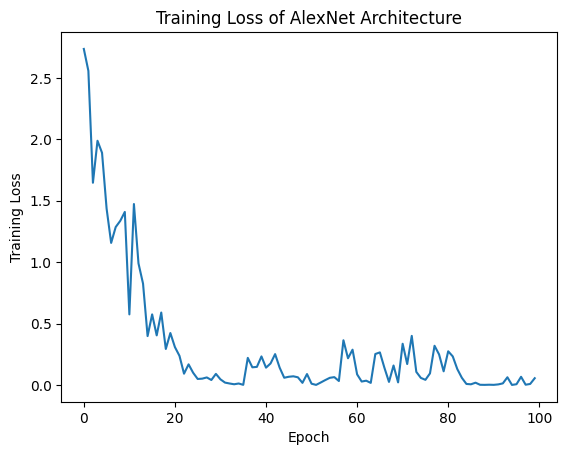

In [34]:
plt.plot(history1.history['loss'])
plt.title('Training Loss of AlexNet Architecture')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()

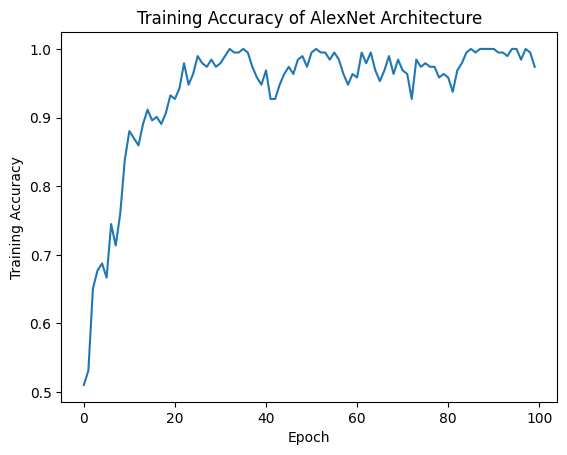

In [35]:
plt.plot(history1.history['accuracy'])
plt.title('Training Accuracy of AlexNet Architecture')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.show()

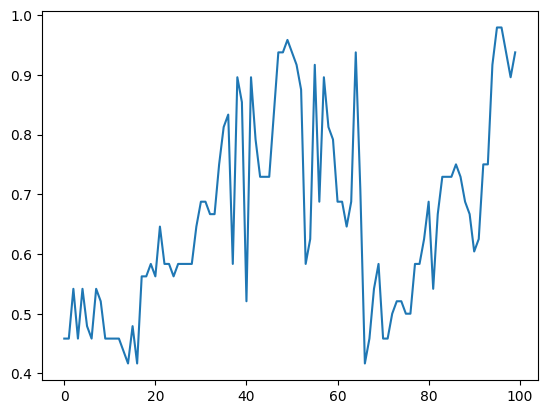

In [22]:
plt.plot(history1.history['val_accuracy'])

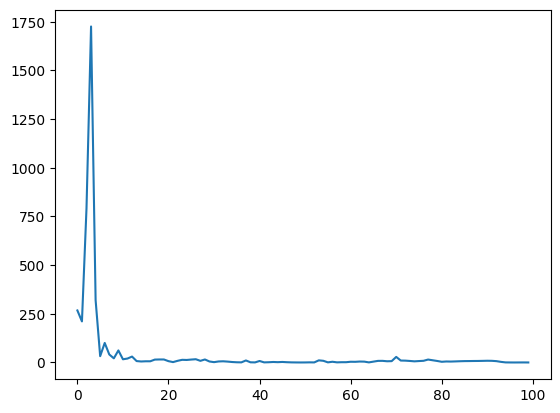

In [23]:
plt.plot(history1.history['val_loss'])

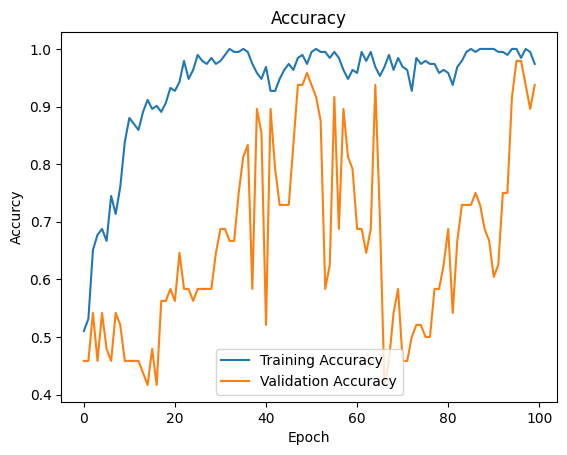

In [24]:
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accurcy')
plt.legend()
plt.show()

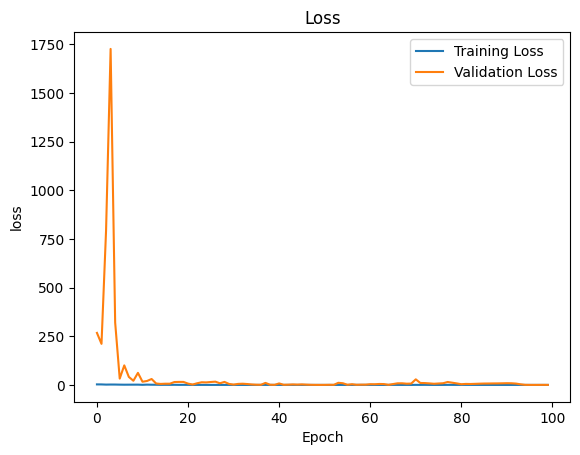

In [25]:
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [26]:
model1.evaluate(test_t)

2/2 [==============================] - 1s 37ms/step - loss: 0.0978 - accuracy: 0.9412


[0.09776098281145096, 0.9411764740943909]

In [27]:
path = 'dataset1/training_set/faulty/image_0_91.jpeg'
# normal_path = tf.keras.utils.get_file('normal', origin=path)

In [36]:
load_img = tf.keras.utils.load_img(path, target_size=IMAGE_SIZE)

In [37]:
img_array = tf.keras.utils.img_to_array(load_img)
img_array = tf.expand_dims(img_array, 0)

In [38]:
prediction = model1.predict(img_array)

1/1 [==============================] - 0s 355ms/step


In [39]:
class_names = train_ds.class_names

In [44]:
class_names

['faulty', 'normal']

In [40]:
prediction

array([[1.1049592e-06]], dtype=float32)

In [46]:
test_prob = model1.predict(test_t)

2/2 [==============================] - 0s 32ms/step


In [49]:
test_classes = test_prob.argmax(axis=1)

In [50]:
test_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)